# Salary Assignment

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

## Loading the dataset

In [2]:
data = pd.read_csv("Salary_Data.csv")

## Data Understanding

In [3]:
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
data.corr() 

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [1]:
# There is a high correlation between feature and target

In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Visualising Feature and Target

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


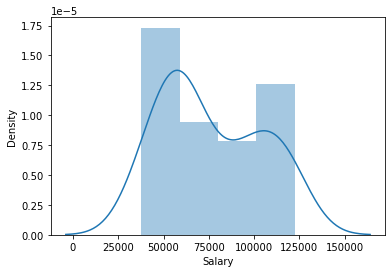

In [7]:
sns.distplot(data['Salary'])
import warnings
warnings.filterwarnings('ignore')

## Data is right skewed ,so we will apply log and sqrt to make a data normally distributed

In [9]:
sal = np.log(data['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

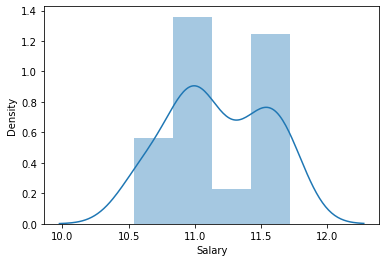

In [10]:
sns.distplot(sal)

In [11]:
sal1 =  np.sqrt(data['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

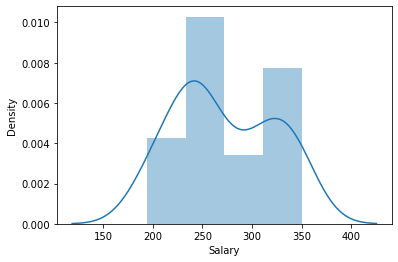

In [12]:
sns.distplot(sal1)

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

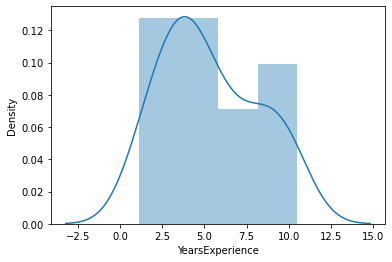

In [13]:
sns.distplot(data['YearsExperience'])

In [14]:
exp = np.sqrt(data['YearsExperience'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

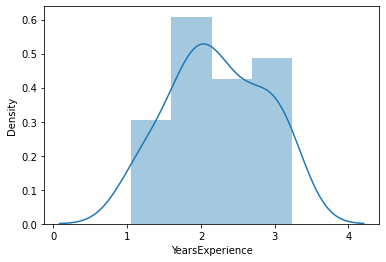

In [15]:
sns.distplot(exp)

## Converting dataset into feature and target

In [16]:
y = sal
# Similarly, our independent variable (x) is YearsExperience
x1 = exp

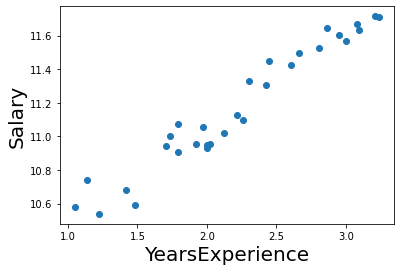

In [17]:
plt.scatter(x1,y)
# Name the axes
plt.xlabel('YearsExperience', fontsize = 20)
plt.ylabel('Salary', fontsize = 20)
# Show the plot
plt.show()

# Prepairing a Model

In [18]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     466.4
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           5.37e-19
Time:                        18:50:29   Log-Likelihood:                 30.933
No. Observations:                  30   AIC:                            -57.87
Df Residuals:                      28   BIC:                            -55.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.9274      0.060    165.502      0.000       9.805      10.050
YearsExperience     0.5620      0.026     21.596      0.000       0.509       0.615
==============================================================================
Omnibus:                        1.111   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                0.938
Skew:                           0.186   Prob(JB):                        0.626
Kurtosis:                       2.218   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


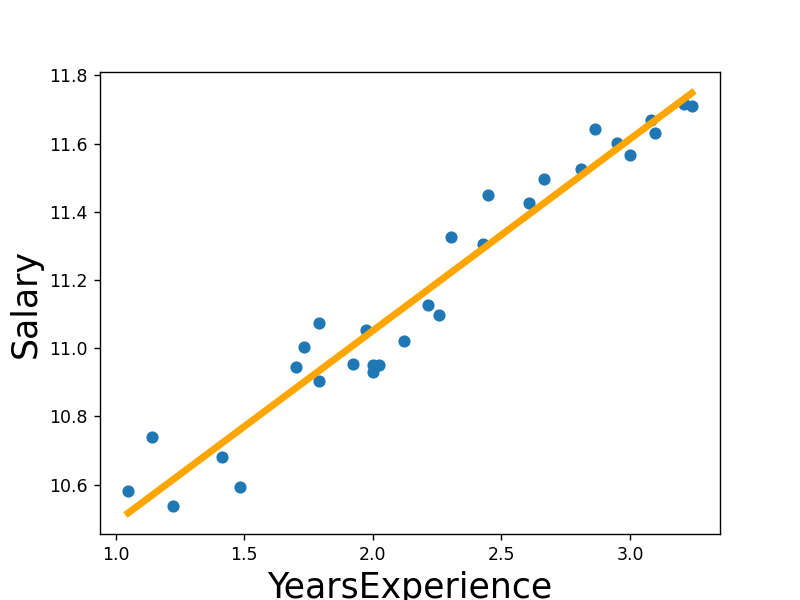

In [20]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 0.5620*x1 + 9.9274
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('YearsExperience', fontsize = 20)
plt.ylabel('Salary', fontsize = 20)
plt.show()

## Predicting a Values

In [21]:
x1 = 3

In [22]:
yhat

0     10.516831
1     10.568179
2     10.615707
3     10.722188
4     10.760981
5     10.884452
6     10.900813
7     10.932736
8     10.932736
9     11.008429
10    11.037261
11    11.051400
12    11.051400
13    11.065363
14    11.119582
15    11.171440
16    11.196575
17    11.221221
18    11.292493
19    11.304013
20    11.392917
21    11.424895
22    11.507010
23    11.536723
24    11.585062
25    11.613400
26    11.659600
27    11.668693
28    11.731061
29    11.748488
Name: YearsExperience, dtype: float64

In [23]:
yhat= np.exp(yhat)

In [24]:
yhat

0      36931.885872
1      38877.796746
2      40770.196590
3      45351.023403
4      47144.880820
5      53340.518256
6      54220.402900
7      55979.238656
8      55979.238656
9      60380.928712
10     62147.201787
11     63032.137856
12     63032.137856
13     63918.445987
14     67479.696099
15     71071.382019
16     72880.376101
17     74698.938608
18     80217.201780
19     81146.645531
20     88691.266353
21     91573.332249
22     99410.194908
23    102408.304559
24    107480.191806
25    110569.548484
26    115797.740847
27    116855.488864
28    124375.569660
29    126562.069684
Name: YearsExperience, dtype: float64